In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [328]:
dataframe=pd.read_csv('/content/House Price Prediction Dataset.csv')

In [329]:
print(dataframe)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

In [330]:
dataframe.drop(['Id'],axis=1,inplace=True)

In [331]:
dataframe.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [332]:
dataframe.shape

(2000, 9)

In [333]:
dataframe.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [334]:
dataframe.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [335]:
location_avg_price = dataframe.groupby('Location')['Price'].transform('mean')
dataframe['Location_ratio'] = dataframe['Price'] / location_avg_price

print(dataframe[['Location', 'Price', 'Location_ratio']])


def encoding_features(dataframe):
    condition_mapping = {'Excellent': 1, 'Fair': 2, 'Good': 3, 'Poor': 4}
    location_mapping = {'Downtown': 1, 'Rural': 2, 'Suburban': 3, 'Urban': 4}
    dataframe = dataframe.copy()
    dataframe['ConditionEncoding'] = dataframe['Condition'].map(condition_mapping)
    dataframe['LocationalEncoding'] = dataframe['Location'].map(location_mapping)
    return dataframe

dataframe = encoding_features(dataframe)


dataframe['Garage'] = dataframe['Garage'].map({'Yes': 1, 'No': 0})

print(dataframe['Garage'].head())

      Location   Price  Location_ratio
0     Downtown  149919        0.279668
1     Downtown  424998        0.792818
2     Downtown  266746        0.497605
3     Suburban  244020        0.437770
4     Downtown  636056        1.186540
...        ...     ...             ...
1995  Suburban  295620        0.530340
1996  Suburban  580929        1.042182
1997     Rural  476925        0.885467
1998     Urban  161119        0.310463
1999  Suburban  482525        0.865646

[2000 rows x 3 columns]
0    0
1    0
2    0
3    1
4    1
Name: Garage, dtype: int64


plt.figure(figsize=(10,10))
sns.heatmap(correalation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

<Axes: >

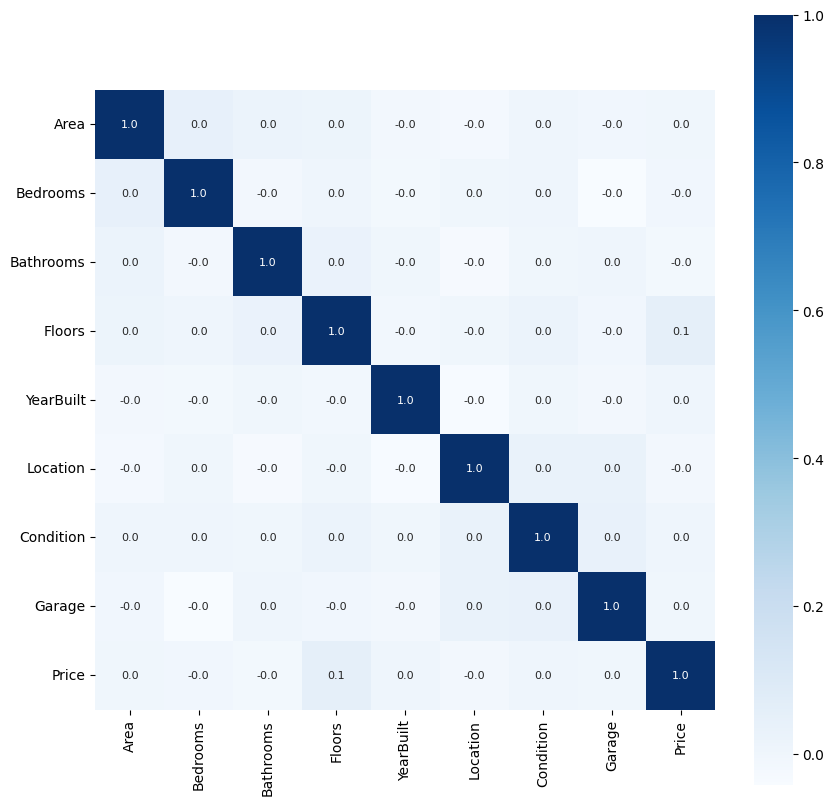

In [336]:
plt.figure(figsize=(10,10))
sns.heatmap(correalation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [337]:
x=dataframe.drop(['Price','Condition','Location'],axis=1)
y=dataframe['Price']

In [338]:

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [339]:
print(x.shape,X_train.shape,X_test.shape)

(2000, 9) (1600, 9) (400, 9)


In [340]:
model=LinearRegression()

In [341]:
model.fit(X_train,Y_train)

LinearRegression()

In [342]:
y_pred=model.predict(X_test)

grid_search.fit(X_train, Y_train)

In [343]:
test_r2 = metrics.r2_score(Y_test, y_pred)
test_mae = metrics.mean_absolute_error(Y_test, y_pred)
test_mse = metrics.mean_squared_error(Y_test, y_pred)

print("\nXGBoost Test Set Performance:")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error: {test_mae}")
print(f"Mean Squared Error: {test_mse}")


XGBoost Test Set Performance:
R² Score: 0.9968189524850175
Mean Absolute Error: 11423.981722815633
Mean Squared Error: 247481770.13177764


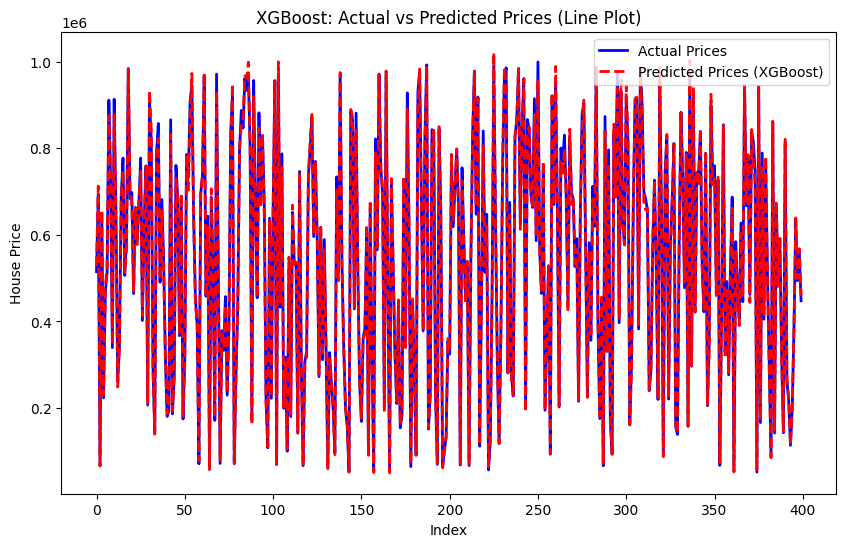

In [344]:
plt.figure(figsize=(10,6))
plt.plot(Y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices (XGBoost)', color='red', linestyle='--', linewidth=2)
plt.xlabel("Index")
plt.ylabel("House Price")
plt.title("XGBoost: Actual vs Predicted Prices (Line Plot)")
plt.legend()
plt.show()


Random Forest Test Set Performance:
R² Score: 0.9997813676150805
Mean Absolute Error: 2888.0564000000036
Mean Squared Error: 17009343.423248015


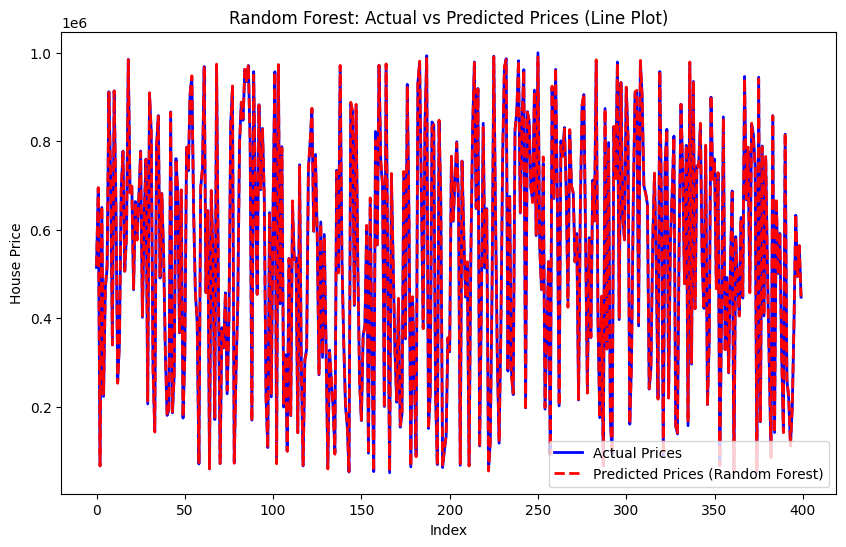

In [345]:
rf_model = RandomForestRegressor(n_estimators=25, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, Y_train)

# Evaluate the Random Forest model on the test set
rf_test_prediction = rf_model.predict(X_test)
rf_test_r2 = metrics.r2_score(Y_test, rf_test_prediction)
rf_test_mae = metrics.mean_absolute_error(Y_test, rf_test_prediction)
rf_test_mse = metrics.mean_squared_error(Y_test, rf_test_prediction)

print("\nRandom Forest Test Set Performance:")
print(f"R² Score: {rf_test_r2}")
print(f"Mean Absolute Error: {rf_test_mae}")
print(f"Mean Squared Error: {rf_test_mse}")

# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(10,6))
plt.plot(Y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(rf_test_prediction, label='Predicted Prices (Random Forest)', color='red', linestyle='--', linewidth=2)
plt.xlabel("Index")
plt.ylabel("House Price")
plt.title("Random Forest: Actual vs Predicted Prices (Line Plot)")
plt.legend()
plt.show()